# VISUALIZING THE CRIMES OF CHICAGO

Importing the libraries to perform visualization

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Chicago_crime_analysis").getOrCreate()

Defining the data types of the data frame along with the schema

In [41]:
from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)
crimes_schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", DateType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])

Loading the data into a data frame

In [42]:
crimes = spark.read.csv("/Users/manje/Documents/MANJEERA/SEM 2/BIG DATA ANALYTICS/TECHNIAL PROJECT/output_file_final.csv",
                       header = True, 
                        schema = crimes_schema)

In [43]:
crimes.select("Date").show(10, truncate = False)

+-------------------+
|Date               |
+-------------------+
|2001-01-01 11:00:00|
|2017-10-08 03:00:00|
|2017-03-28 14:00:00|
|2017-09-09 20:17:00|
|2017-08-26 10:00:00|
|2013-02-10 00:00:00|
|2015-01-01 00:01:00|
|2017-01-01 00:01:00|
|2017-07-17 10:10:00|
|2017-12-28 15:55:00|
+-------------------+
only showing top 10 rows



In [48]:
#Displaying a few records from the data frame
crimes.select(["Latitude","Longitude","Year","XCoordinate","YCoordinate"]).describe().show()

+-------+-------------------+-------------------+-----------------+------------------+------------------+
|summary|           Latitude|          Longitude|             Year|       XCoordinate|       YCoordinate|
+-------+-------------------+-------------------+-----------------+------------------+------------------+
|  count|            6965334|            6965334|          6965334|           6965334|           6965334|
|   mean|  41.84205876273965| -87.67172162733762|2008.750661633742|1164538.6183268456|1885737.0620759896|
| stddev|0.08989553014394086|0.06204369102102771|5.321532505945641|17142.669567692363|32669.015284746787|
|    min|       36.619446395|      -91.686565684|             2001|               0.0|               0.0|
|    max|       42.022910333|      -87.524529378|             2019|         1205119.0|         1951622.0|
+-------+-------------------+-------------------+-----------------+------------------+------------------+



In [49]:
#Displaying the summary of the dataset
from pyspark.sql.functions import format_number
result = crimes.select(["Latitude","Longitude","Year","XCoordinate","YCoordinate"]).describe()
result.select(result['summary'],
              format_number(result['Latitude'].cast('float'),2).alias('Latitude'),
              format_number(result['Longitude'].cast('float'),2).alias('Longitude'),
              result['Year'].cast('int').alias('year'),
              format_number(result['XCoordinate'].cast('float'),2).alias('XCoordinate'),
              format_number(result['YCoordinate'].cast('float'),2).alias('YCoordinate')
             ).show()

+-------+------------+------------+-------+------------+------------+
|summary|    Latitude|   Longitude|   year| XCoordinate| YCoordinate|
+-------+------------+------------+-------+------------+------------+
|  count|6,965,334.00|6,965,334.00|6965334|6,965,334.00|6,965,334.00|
|   mean|       41.84|      -87.67|   2008|1,164,538.62|1,885,737.00|
| stddev|        0.09|        0.06|      5|   17,142.67|   32,669.02|
|    min|       36.62|      -91.69|   2001|        0.00|        0.00|
|    max|       42.02|      -87.52|   2019|1,205,119.00|1,951,622.00|
+-------+------------+------------+-------+------------+------------+



In [50]:
#Calculating the total crimes according the year
count = [item[1] for item in df.groupBy("Year").count().collect()]
year = [item[0] for item in df.groupBy("Year").count().collect()]
number_of_crimes_per_year = {"count":count, "year" : year}
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
number_of_crimes_per_year = pd.DataFrame(number_of_crimes_per_year)
number_of_crimes_per_year.head()

,count,year
0,475949,2003
1,437031,2007
2,267700,2018
3,264293,2015
4,448129,2006


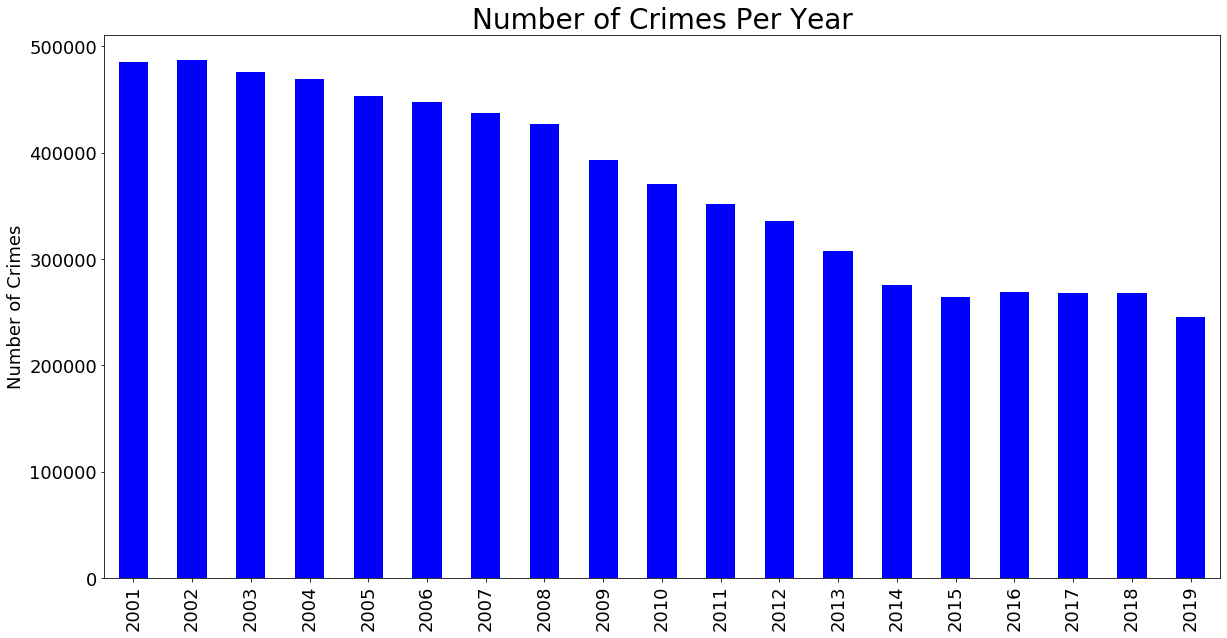

In [51]:
#Defining the coordinates to display plot the crimes from the points
number_of_crimes_per_year = number_of_crimes_per_year.sort_values(by = "year")
number_of_crimes_per_year.plot(figsize = (20,10), kind = "bar", color = "blue",
                               x = "year", y = "count", legend = False)
plt.xlabel("", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Year", fontsize = 28)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

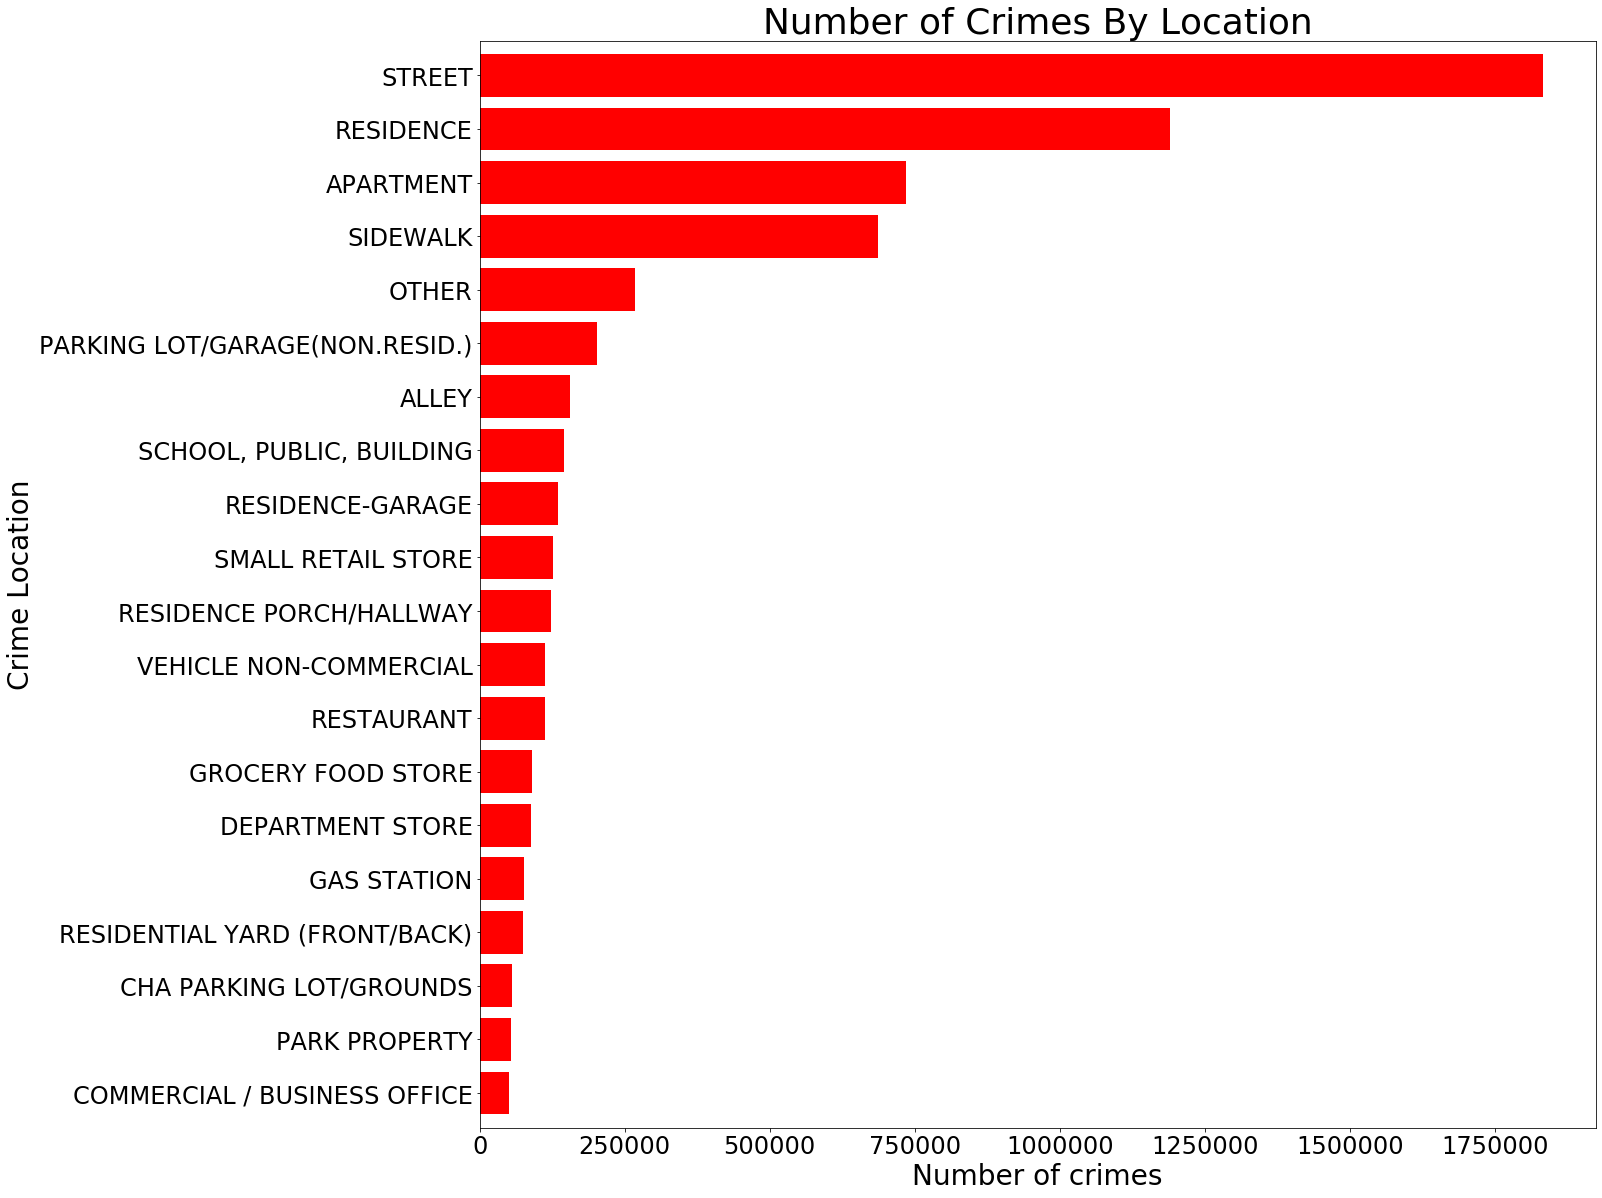

In [53]:
# Counting the total number of crimes according to the crime location
crime_location  = crimes.groupBy("LocationDescription").count().collect()
location = [item[0] for item in crime_location]
count = [item[1] for item in crime_location]
crime_location = {"location" : location, "count": count}
crime_location = pd.DataFrame(crime_location)
crime_location = crime_location.sort_values(by = "count", ascending  = False)
crime_location = crime_location.iloc[:20]
myplot = crime_location .plot(figsize = (20,20), kind = "barh", color = "red", width = 0.8,
                               x = "location", y = "count", legend = False)
myplot.invert_yaxis()
plt.xlabel("Number of crimes", fontsize = 28)
plt.ylabel("Crime Location", fontsize = 28)
plt.title("Number of Crimes By Location", fontsize = 36)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

In [92]:
# crime types
crime_type_groups = df.groupBy('PrimaryType').count()

In [93]:
#Counting the crimes
crime_type_counts = crime_type_groups.orderBy('count', ascending=False)

In [94]:
crime_type_counts.show(truncate=False)

+--------------------------------+-------+
|PrimaryType                     |count  |
+--------------------------------+-------+
|THEFT                           |1486432|
|BATTERY                         |1285561|
|CRIMINAL DAMAGE                 |800484 |
|NARCOTICS                       |726658 |
|ASSAULT                         |440824 |
|OTHER OFFENSE                   |436869 |
|BURGLARY                        |398672 |
|MOTOR VEHICLE THEFT             |324105 |
|DECEPTIVE PRACTICE              |284366 |
|ROBBERY                         |264485 |
|CRIMINAL TRESPASS               |200767 |
|WEAPONS VIOLATION               |77402  |
|PROSTITUTION                    |69063  |
|PUBLIC PEACE VIOLATION          |49452  |
|OFFENSE INVOLVING CHILDREN      |48131  |
|CRIM SEXUAL ASSAULT             |29094  |
|SEX OFFENSE                     |26598  |
|INTERFERENCE WITH PUBLIC OFFICER|16776  |
|GAMBLING                        |14568  |
|LIQUOR LAW VIOLATION            |14310  |
+----------

In [95]:
counts_pddf = pd.DataFrame(crime_type_counts.rdd.map(lambda l: l.asDict()).collect())

[Text(0, 0.5, 'Primary Type'), Text(0.5, 0, 'Crimes Record Count')]

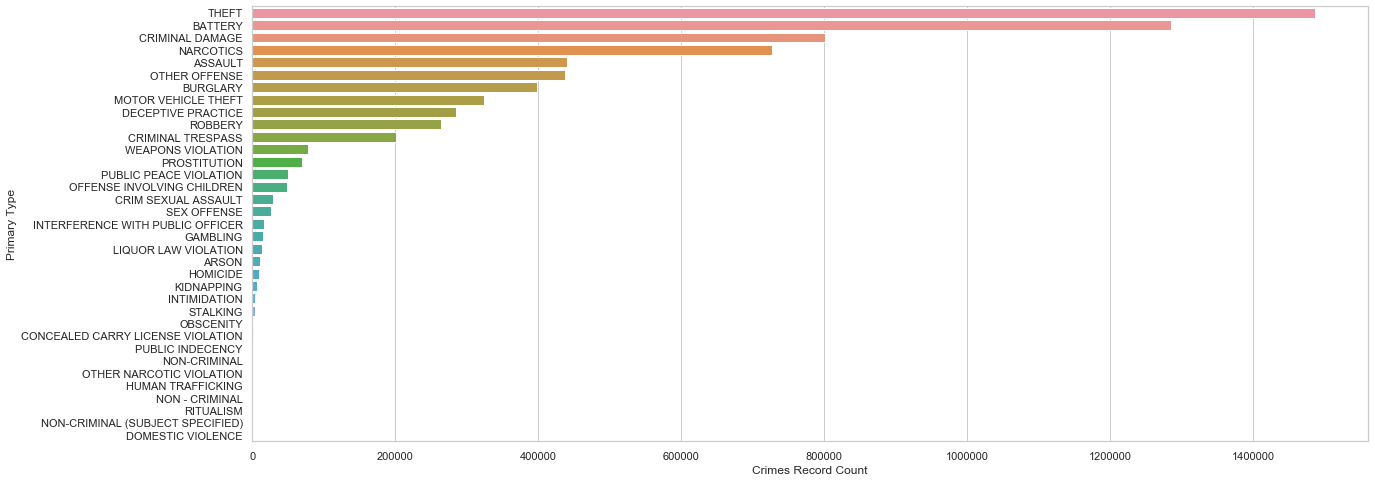

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 8]

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='count', y='PrimaryType', data=counts_pddf)
type_graph.set(ylabel="Primary Type", xlabel="Crimes Record Count")